In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('t2.csv')

In [ ]:
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.62419E+18,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1.62416E+18,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1.62414E+18,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1.62412E+18,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1.62412E+18,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False


In [ ]:
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Check if the text is a string
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'\W|\d', ' ', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
# Apply preprocessing to the 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)


In [ ]:
# Remove rows where preprocessed_text is empty
df = df[df['preprocessed_text'] != ""]

In [ ]:
# Display the first few rows of preprocessed text
print(df[['text', 'preprocessed_text']].head())

                                                text  \
0  @simonkjaer1989 @acmilan @acmilanbr @acmilanar...   
1  Hi People...any help here would be much apprec...   
2  @JLo @intimissimi #TurkeyQuake  we are in desp...   
3  thank you rafael this means a lot 😭😭😭💜 #Turkey...   
4  @adgpi Hey @BBCWorld try to cover these storie...   

                                   preprocessed_text  
0                 hi simon fenerbahçe supporter hear  
1  hi people help would much appreciated quick le...  
2                desperate please help jennifer love  
3                              thank rafael mean lot  
4  hey try cover story absolute truth rather maki...  


In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply the sentiment analysis to the preprocessed text column
df['vader_sentiment'] = df['preprocessed_text'].apply(vader_sentiment)

# Display the sentiment scores
print(df[['preprocessed_text', 'vader_sentiment']].head())

                                   preprocessed_text  vader_sentiment
0                 hi simon fenerbahçe supporter hear           0.2732
1  hi people help would much appreciated quick le...           0.7184
2                desperate please help jennifer love           0.7845
3                              thank rafael mean lot           0.3612
4  hey try cover story absolute truth rather maki...           0.3182


In [ ]:
from textblob import TextBlob

# Function to get TextBlob sentiment polarity
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the TextBlob sentiment analysis to the preprocessed text column
df['textblob_sentiment'] = df['preprocessed_text'].apply(textblob_sentiment)

# Display the TextBlob sentiment polarity scores
print(df[['preprocessed_text', 'textblob_sentiment']].head())

                                   preprocessed_text  textblob_sentiment
0                 hi simon fenerbahçe supporter hear            0.000000
1  hi people help would much appreciated quick le...            0.266667
2                desperate please help jennifer love           -0.050000
3                              thank rafael mean lot           -0.312500
4  hey try cover story absolute truth rather maki...            0.200000


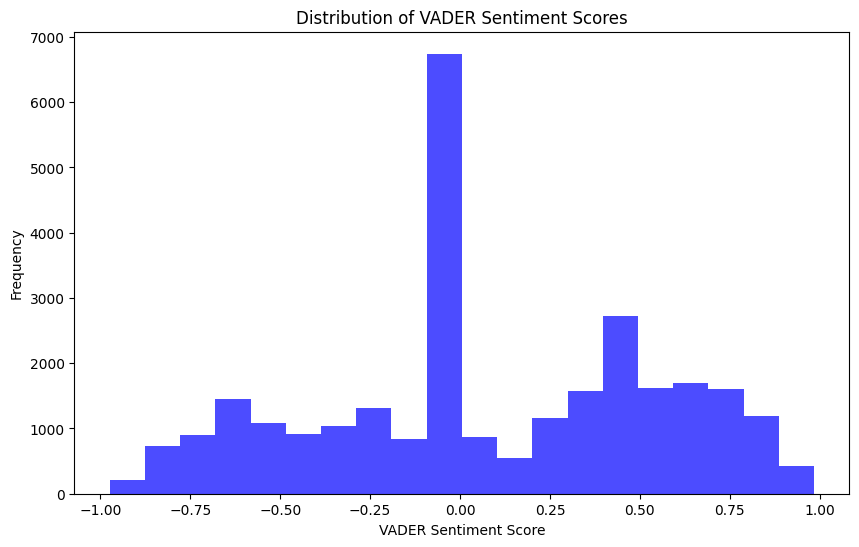

In [ ]:
# prompt: write code for making bar graph on vader_sentiment and textblob_sentiment

import matplotlib.pyplot as plt

# Create a bar graph for VADER sentiment
plt.figure(figsize=(10, 6))
plt.hist(df['vader_sentiment'], bins=20, color='blue', alpha=0.7)
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of VADER Sentiment Scores')
plt.show()

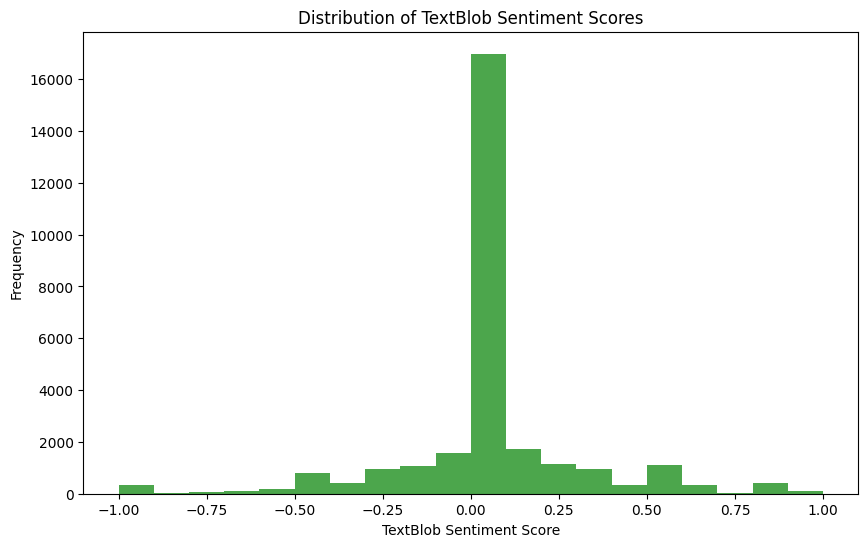

In [ ]:
# Create a bar graph for TextBlob sentiment
plt.figure(figsize=(10, 6))
plt.hist(df['textblob_sentiment'], bins=20, color='green', alpha=0.7)
plt.xlabel('TextBlob Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of TextBlob Sentiment Scores')
plt.show()

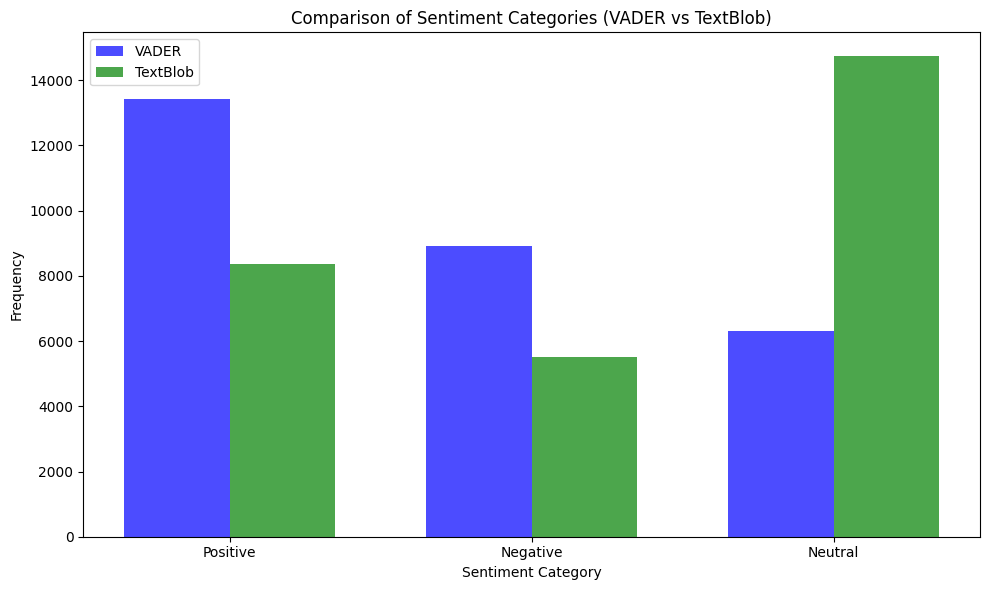

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume df has columns 'vader_sentiment' and 'textblob_sentiment'

# Categorize VADER sentiment (positive, negative, neutral)
vader_pos = sum(df['vader_sentiment'] > 0)
vader_neg = sum(df['vader_sentiment'] < 0)
vader_neu = sum(df['vader_sentiment'] == 0)

# Categorize TextBlob sentiment (positive, negative, neutral)
textblob_pos = sum(df['textblob_sentiment'] > 0)
textblob_neg = sum(df['textblob_sentiment'] < 0)
textblob_neu = sum(df['textblob_sentiment'] == 0)

# Define the sentiment categories and their values
categories = ['Positive', 'Negative', 'Neutral']
vader_counts = [vader_pos, vader_neg, vader_neu]
textblob_counts = [textblob_pos, textblob_neg, textblob_neu]

# Plot the grouped bar chart
x = np.arange(len(categories))  # Label locations
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for VADER
rects1 = ax.bar(x - width/2, vader_counts, width, label='VADER', color='blue', alpha=0.7)

# Create bars for TextBlob
rects2 = ax.bar(x + width/2, textblob_counts, width, label='TextBlob', color='green', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Sentiment Categories (VADER vs TextBlob)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert preprocessed text to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [ ]:
from sklearn.cluster import KMeans

# Set the number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-Means and predict clusters
df['cluster'] = kmeans.fit_predict(X)

# Display the first few rows of cluster assignments
print(df[['preprocessed_text', 'cluster']].head())

                                   preprocessed_text  cluster
0                 hi simon fenerbahçe supporter hear        1
1  hi people help would much appreciated quick le...        1
2                desperate please help jennifer love        1
3                              thank rafael mean lot        1
4  hey try cover story absolute truth rather maki...        1


In [ ]:
pd.set_option('display.max_colwidth', None)
for i in range(5):  # Assuming 3 clusters
    print(f"Cluster {i} sample tweets:")
    print(df[df['cluster'] == i]['preprocessed_text'].sample(10))
    print("\n")

Cluster 0 sample tweets:
28019                                   magnitude earthquake strike near turkey syria border region
25162                                           magnitude hard comprehend almost building destroyed
25594                    magnitude tremor struck southeastern turkey northern syria february killed
25217    magnitude eathquake hit turkey southern hatay province say disaster management agency afad
19786                     video two turkish nurse going way protect infant magnitude earthquake sur
26684                                             two earthquake hit turkey fortnight deadly tremor
24632                                                      another quake magnitude hit get u detail
10370           earthquake magnitude occurred km south south east sse kahramanmaraş usgs earthquake
24887                                                                        another earthquake hit
27246                      magnitude earthquake second measuring hit turkey

In [ ]:
cluster_to_sentiment = {0: 'Neutral', 1: 'Positive', 2: 'Positive', 3: 'Negative', 4: 'Positive'}
df['pseudo_sentiment'] = df['cluster'].map(cluster_to_sentiment)

# Display the first few rows with pseudo sentiment labels
print(df[['preprocessed_text', 'cluster', 'pseudo_sentiment']].head(20))

                                                                          preprocessed_text  \
0                                                        hi simon fenerbahçe supporter hear   
1                            hi people help would much appreciated quick legit reaction try   
2                                                       desperate please help jennifer love   
3                                                                     thank rafael mean lot   
4                                 hey try cover story absolute truth rather making baseless   
5                                                                               picture day   
6            support affected earthquake use charity wallet eth xd bd b c daedf ad b ba ddd   
7                                                                          cant believe see   
8        help turkey earthquake disaster occurred turkey urgently lack tent support country   
9   help turkey earthquake disaster occurred turke

In [ ]:
pd.set_option('display.max_colwidth', None)  # This ensures that the entire text is displayed
print(df[df['cluster'] == 0][['preprocessed_text']].tail(50))

                                                                                            preprocessed_text
28439                                                     turkey got hit another magnitude earthquake stanbul
28442                            another magnitude earthquake hit turkey yea allah keep everyone safe mercy u
28445                                 people aleppo syria street fearing another earthquake could hit country
28447                                     another strong magnitude quake recorded southern near syrian border
28452                    magnitude earthquake struck along turkish syrian border earlier today two week devas
28457                      footage shaking adana city hospital magnitude earthquake hatay hour ago adana line
28459                                         another earthquake strike southern turkey stirring panic isaiah
28471                                 monday earthquake centered one worst hit region magnitude quake hit feb
28474     

In [ ]:
# Count the occurrences of each sentiment label in the pseudo_sentiment column
sentiment_counts = df['pseudo_sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)

pseudo_sentiment
Positive    23186
Negative     4510
Neutral       929
Name: count, dtype: int64


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Assuming your preprocessed text data is stored in 'df' and 'pseudo_sentiment' is the target column
# Preprocessing was done in the earlier steps.

# Encode the pseudo_sentiment labels for classification (if necessary)
le = LabelEncoder()
df['encoded_sentiment'] = le.fit_transform(df['pseudo_sentiment'])

# Split the data into features (X) and target (y)
X = df['preprocessed_text']
y = df['encoded_sentiment']

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(X).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    start_time = time.time()

    # Gaussian Naive Bayes requires dense input
    if model_name == "Gaussian Naive Bayes":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    training_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Training Time: {training_time:.4f} seconds")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return model, y_pred, accuracy, cm

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")
    plt.show()



--- Multinomial Naive Bayes ---
Training Time: 0.1621 seconds
Accuracy: 0.8768558951965065
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.40      0.55       961
     Neutral       0.95      0.60      0.74       219
    Positive       0.87      0.99      0.93      4545

    accuracy                           0.88      5725
   macro avg       0.91      0.66      0.74      5725
weighted avg       0.88      0.88      0.86      5725



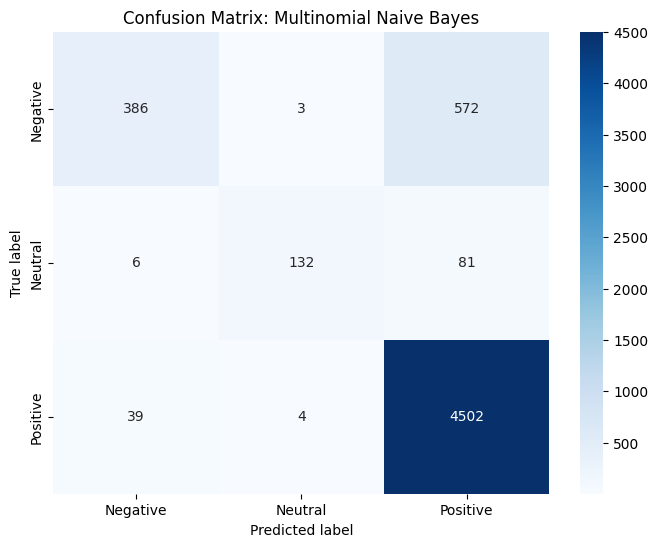


--- Bernoulli Naive Bayes ---
Training Time: 0.6536 seconds
Accuracy: 0.9325764192139738
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.79      0.82       961
     Neutral       0.75      0.91      0.82       219
    Positive       0.96      0.96      0.96      4545

    accuracy                           0.93      5725
   macro avg       0.86      0.89      0.87      5725
weighted avg       0.93      0.93      0.93      5725



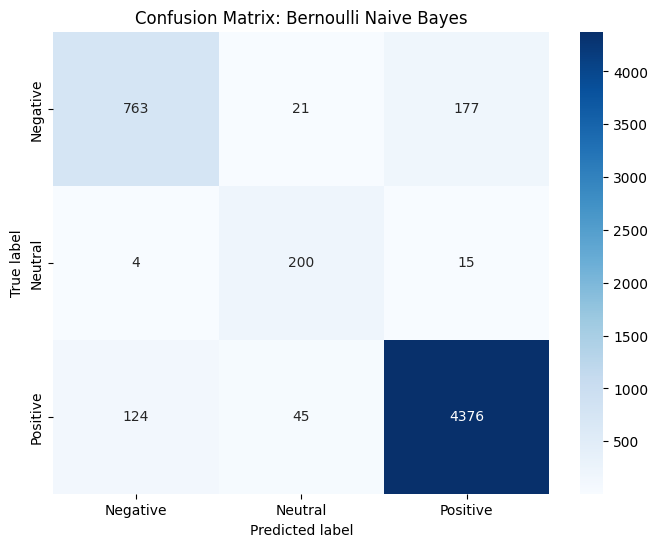


--- Gaussian Naive Bayes ---
Training Time: 1.0088 seconds
Accuracy: 0.42934497816593886
Classification Report:
              precision    recall  f1-score   support

    Negative       0.21      0.68      0.32       961
     Neutral       0.20      0.75      0.31       219
    Positive       0.93      0.36      0.52      4545

    accuracy                           0.43      5725
   macro avg       0.45      0.60      0.38      5725
weighted avg       0.78      0.43      0.48      5725



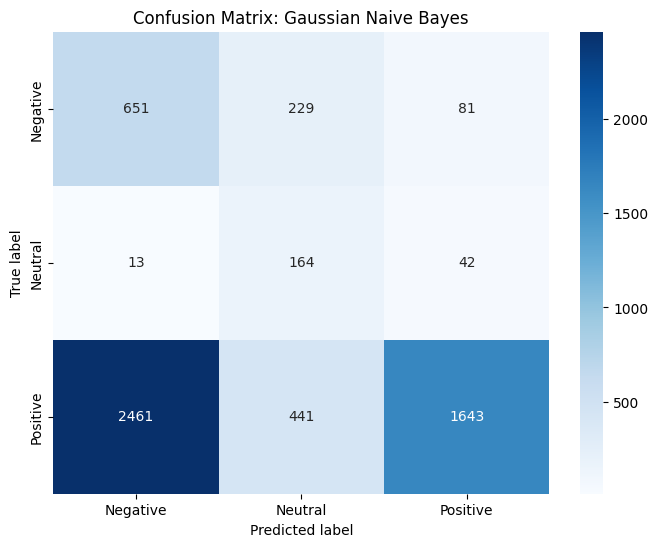


--- SVM (Linear) ---
Training Time: 432.3435 seconds
Accuracy: 0.9842794759825327
Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96       961
     Neutral       0.99      0.97      0.98       219
    Positive       0.99      0.99      0.99      4545

    accuracy                           0.98      5725
   macro avg       0.98      0.97      0.98      5725
weighted avg       0.98      0.98      0.98      5725



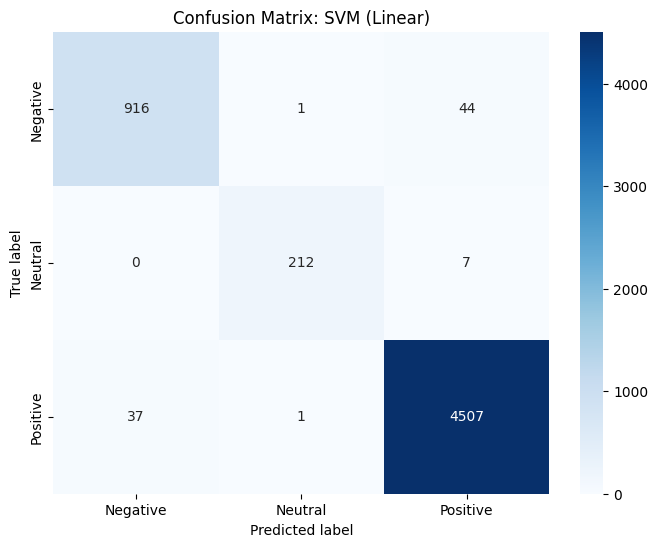


--- SVM (RBF) ---
Training Time: 839.4011 seconds
Accuracy: 0.982882096069869
Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.94      0.96       961
     Neutral       0.99      0.94      0.96       219
    Positive       0.99      0.99      0.99      4545

    accuracy                           0.98      5725
   macro avg       0.98      0.96      0.97      5725
weighted avg       0.98      0.98      0.98      5725



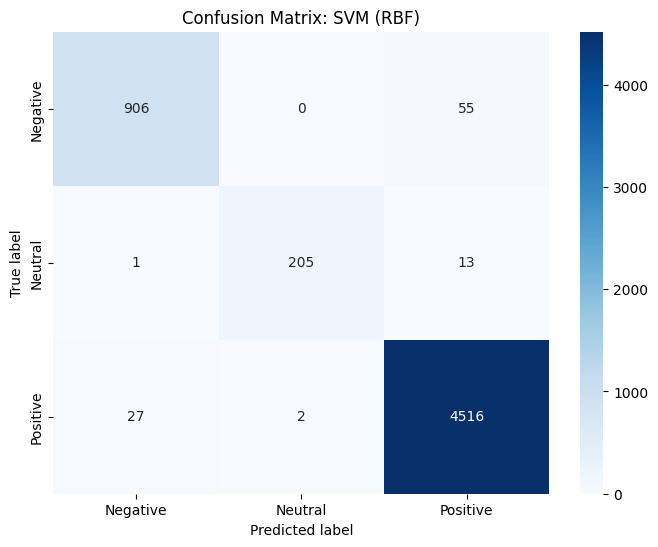

In [ ]:
# Dictionary to store results
results = {}
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM (Linear)': SVC(kernel='linear', probability=True),
    'SVM (RBF)': SVC(kernel='rbf', probability=True)
}

# Iterate over classifiers and evaluate each
for name, model in classifiers.items():
    model, y_pred, accuracy, cm = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results[name] = accuracy


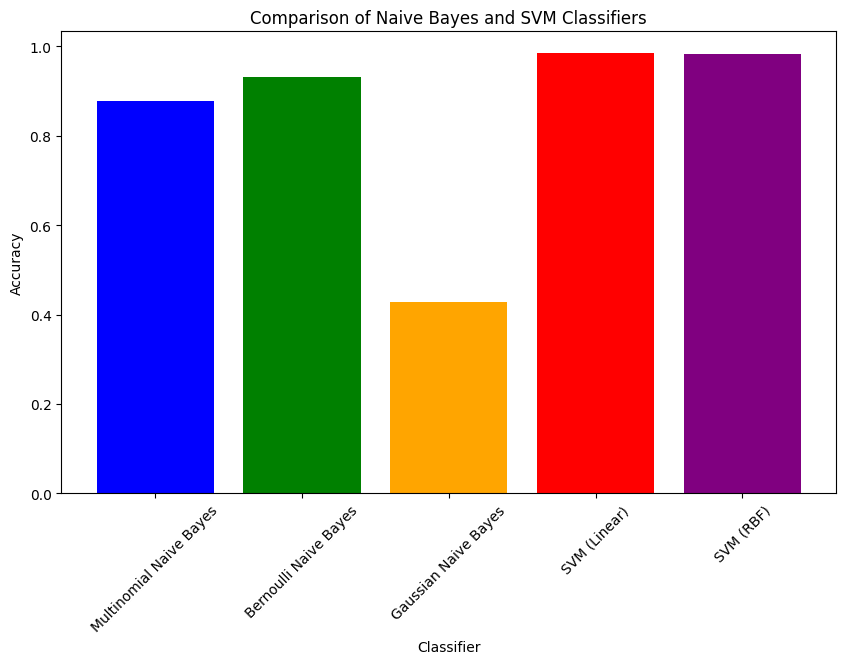

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes and SVM Classifiers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Cross-validation for more robust accuracy evaluation
for name, model in classifiers.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-Validation Average Score for {name}: {np.mean(scores):.4f}")

Cross-Validation Average Score for Multinomial Naive Bayes: 0.8742
Cross-Validation Average Score for Bernoulli Naive Bayes: 0.9155
Cross-Validation Average Score for Gaussian Naive Bayes: 0.4226
